# Exercise: confidence intervals

Suppose I survey $n$ people, chosen randomly in Eugene,
asking how many miles they commute to work.

*Claim:* there is a 95% probability that the mean distance commuted
by people in Eugene
is between $\bar x - 1.96 s / \sqrt{n}$
and  $\bar x - 1.96 s / \sqrt{n}$,
where $\bar x$ is my sample mean, $s$ is my sample SD,
and $n$ is my sample size.

*Exercise:*
come up with a distribution for the number of miles commuted by someone in Eugene.

# Exercise: the bootstrap

In [71]:
N = 1000
def boot(x, n, f):
    bm = np.repeat(np.nan, n)
    for k in range(n):
        sx = rng.choice(x, size=len(x), replace=True)
        bm[k] = f(sx)
    se = np.std(bm)
    # return np.quantile(bm, q=[0.05, 0.95])
    return np.mean(bm) + np.array([-2, 2]) * se

x = rng.gamma(0.5, size=N)
np.median(x), boot(x, 100, np.median)

(0.22955876651637733, array([0.20442436, 0.25229289]))

In [92]:
from scipy.stats import gamma
true_med = gamma.ppf(0.5, 0.5)
xmed = np.repeat(np.nan, 100)
xli = np.repeat(np.nan, 100)
xui = np.repeat(np.nan, 100)
for k in range(len(xmed)):
    x = rng.gamma(0.5, size=2000)
    xmed[k] = np.median(x)
    xli[k], xui[k] = boot(x, 1000, np.median)
    
np.mean(np.logical_or(true_med <= xli, true_med >= xui))

0.05

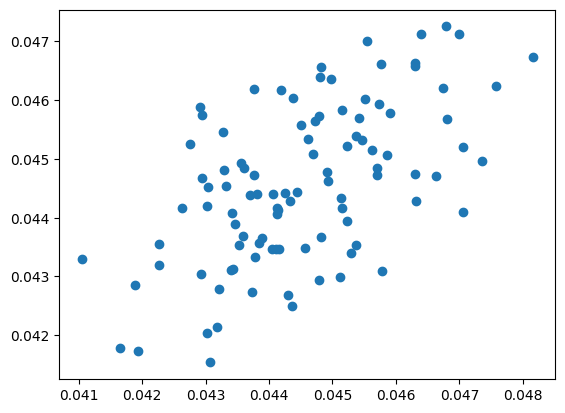

In [69]:
plt.scatter(xmed - xli, xui - xmed)

In [87]:
true_mu = 0
xmed = np.repeat(np.nan, 1000)
xse = np.repeat(np.nan, len(xmed))
for k in range(len(xmed)):
    x = rng.normal(true_mu, size=200)
    xmed[k] = np.mean(x)
    xse[k] = np.std(x) / np.sqrt(len(x))

xli = xmed - 2 * xse
xui = xmed + 2 * xse
    
np.mean(np.logical_or(true_mu <= xli, true_mu >= xui))

0.056